C:\Users\Alexander\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


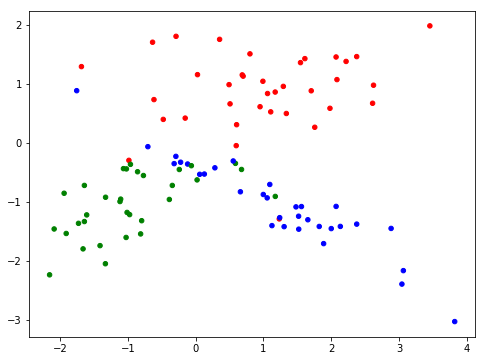

In [2]:
#Генерация и визуализация данных
#Часть кода взята с семинаров
from matplotlib.colors import ListedColormap
from sklearn import cross_validation, datasets, metrics, neighbors
from sklearn.model_selection import KFold
import numpy as np
%pylab inline
%matplotlib inline
classification_problem = datasets.make_classification(n_samples=100, n_features =2, n_informative = 2,n_classes = 3, n_redundant=0, 
                                    n_clusters_per_class=1, random_state=3)

colors = ListedColormap(['red', 'blue', 'green'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightgreen'])
pylab.figure(figsize=(8,6))
pylab.scatter(map(lambda x: x[0], classification_problem[0]), map(lambda x: x[1], classification_problem[0]), 
              c = classification_problem[1], cmap = colors, s = 20)

In [3]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(classification_problem[0],
                                                classification_problem[1], test_size = 0.2,random_state = 1)

def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors = colors, light_colors = light_colors):
    estimator.fit(train_data, train_labels)
    pyplot.figure(figsize = (16, 6))
    pyplot.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    pyplot.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    pyplot.subplot(1,2,2)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors)
    pyplot.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))

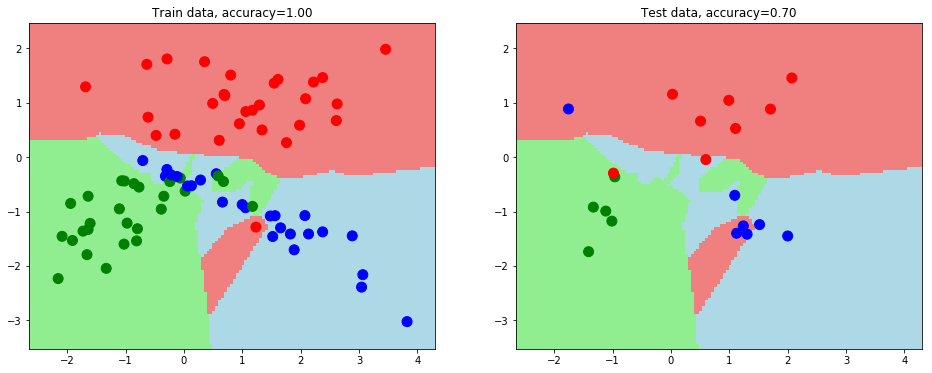

In [4]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=1)
plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

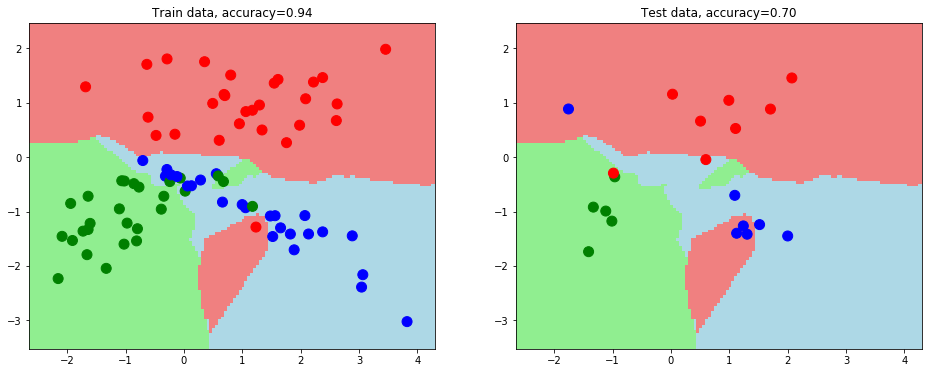

In [5]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=2)
plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

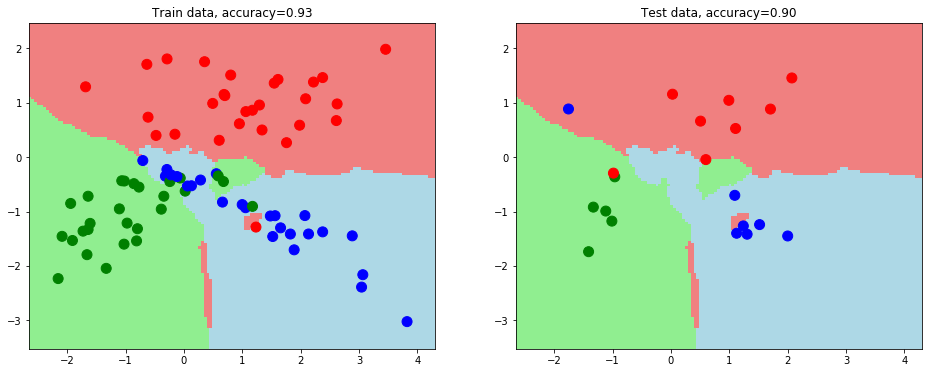

In [6]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=3)
plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

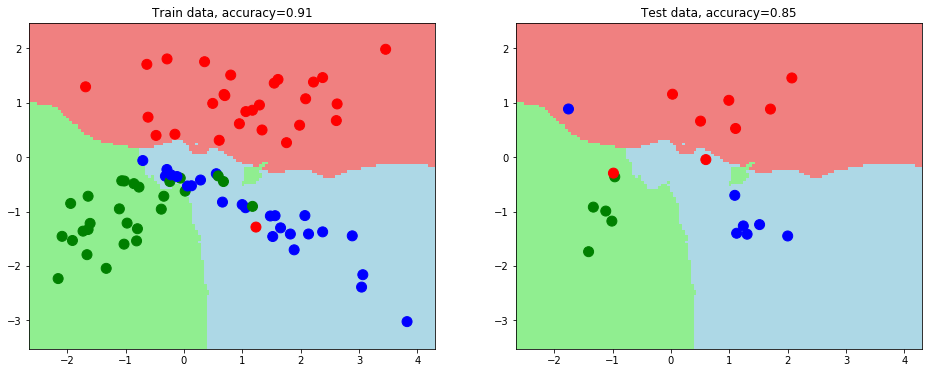

In [7]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=5)
plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

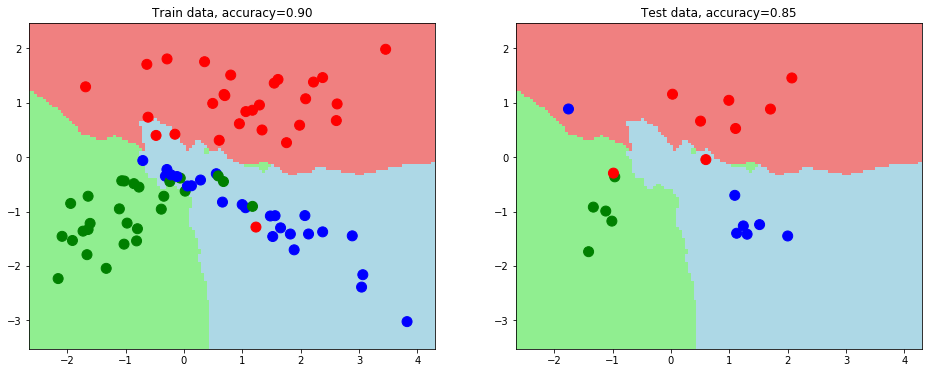

In [8]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=7)
plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

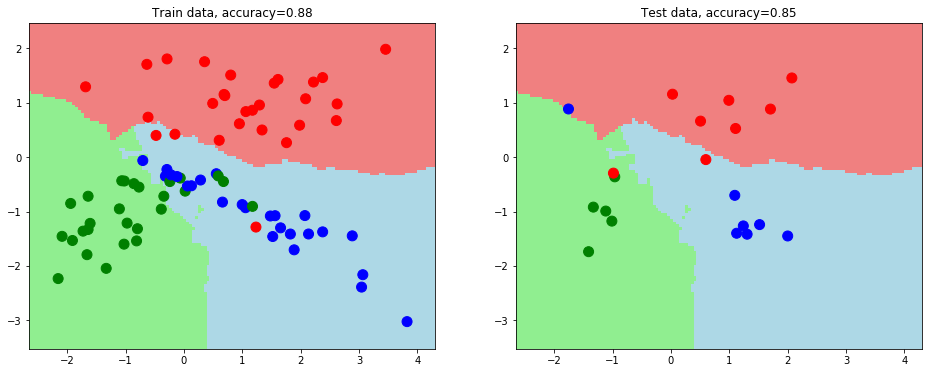

In [9]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=10)
plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

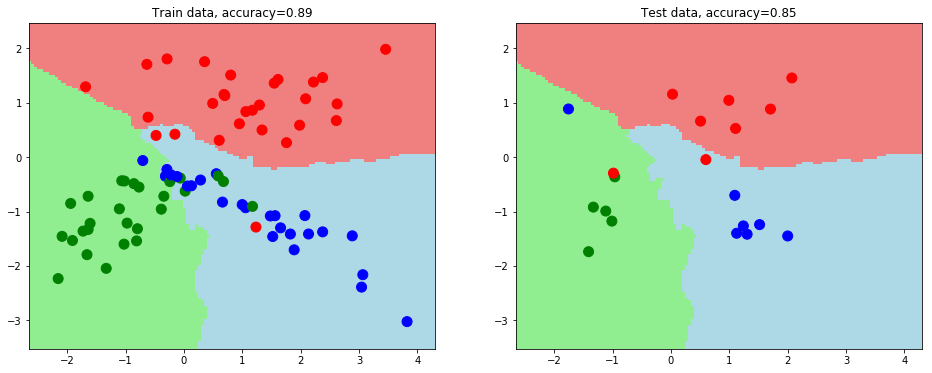

In [10]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=20)
plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

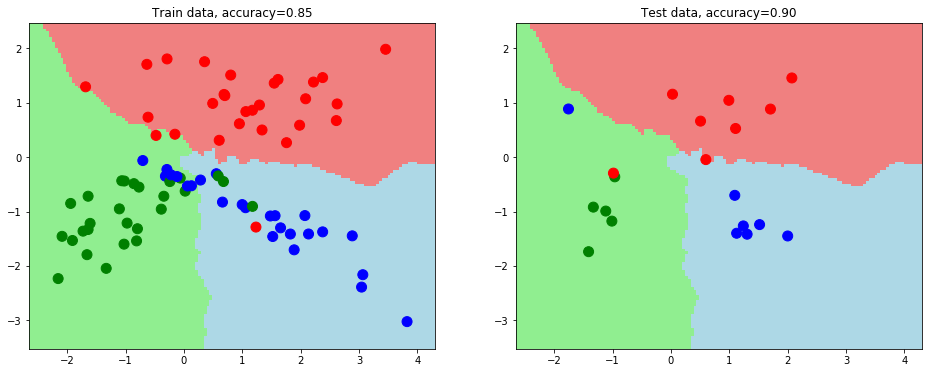

In [11]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=30)
plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

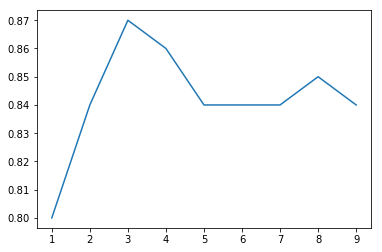

In [12]:
range_ = range(1, 10, 1)
accuracies = []   
kf = KFold(n_splits = 5)
for k in range_:
    sum_ = 0
    clf = neighbors.KNeighborsClassifier(n_neighbors = k)
    for train_indices, test_indices in kf.split([j for j in range(0,100)]):
        train_data = [classification_problem[0][i] for i in train_indices]
        test_data = [classification_problem[0][i] for i in test_indices]
        train_labels = [classification_problem[1][i] for i in train_indices]
        test_labels = [classification_problem[1][i] for i in test_indices]
        clf.fit(train_data, train_labels)
        sum_ += metrics.accuracy_score(test_labels, clf.predict(test_data)) / 5.0
    accuracies.append(sum_)

pyplot.plot(range_, accuracies)
#График точности классификация в зависимости от числа соседей K

Таким образом, видим, что k = 3 - наилучшее по точности